In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/Lemalabs/Data/'
data = pd.read_csv(path + 'breast_cancer_wisconsin_data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

diag_encoder = LabelEncoder()
data['diagnosis'] = diag_encoder.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
input = data.drop(columns = ['id','diagnosis','Unnamed: 32'])
input

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y = data['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input,y,test_size = 0.25, random_state = 1)
x_train.shape, y_train.shape

((426, 30), (426,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(criterion = 'gini')

In [ ]:
dtree1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label = 'diagnosis'
features = input.columns
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graphviz as gr

export_graphviz(dtree1, out_file = 'dtree_cancer.dot', feature_names = features, class_names = label, rounded = True, precision = 4, filled = True)

graph = gr.graph_from_dot_file('dtree_cancer.dot')

graph.write_png('tree_cancer.png')

True

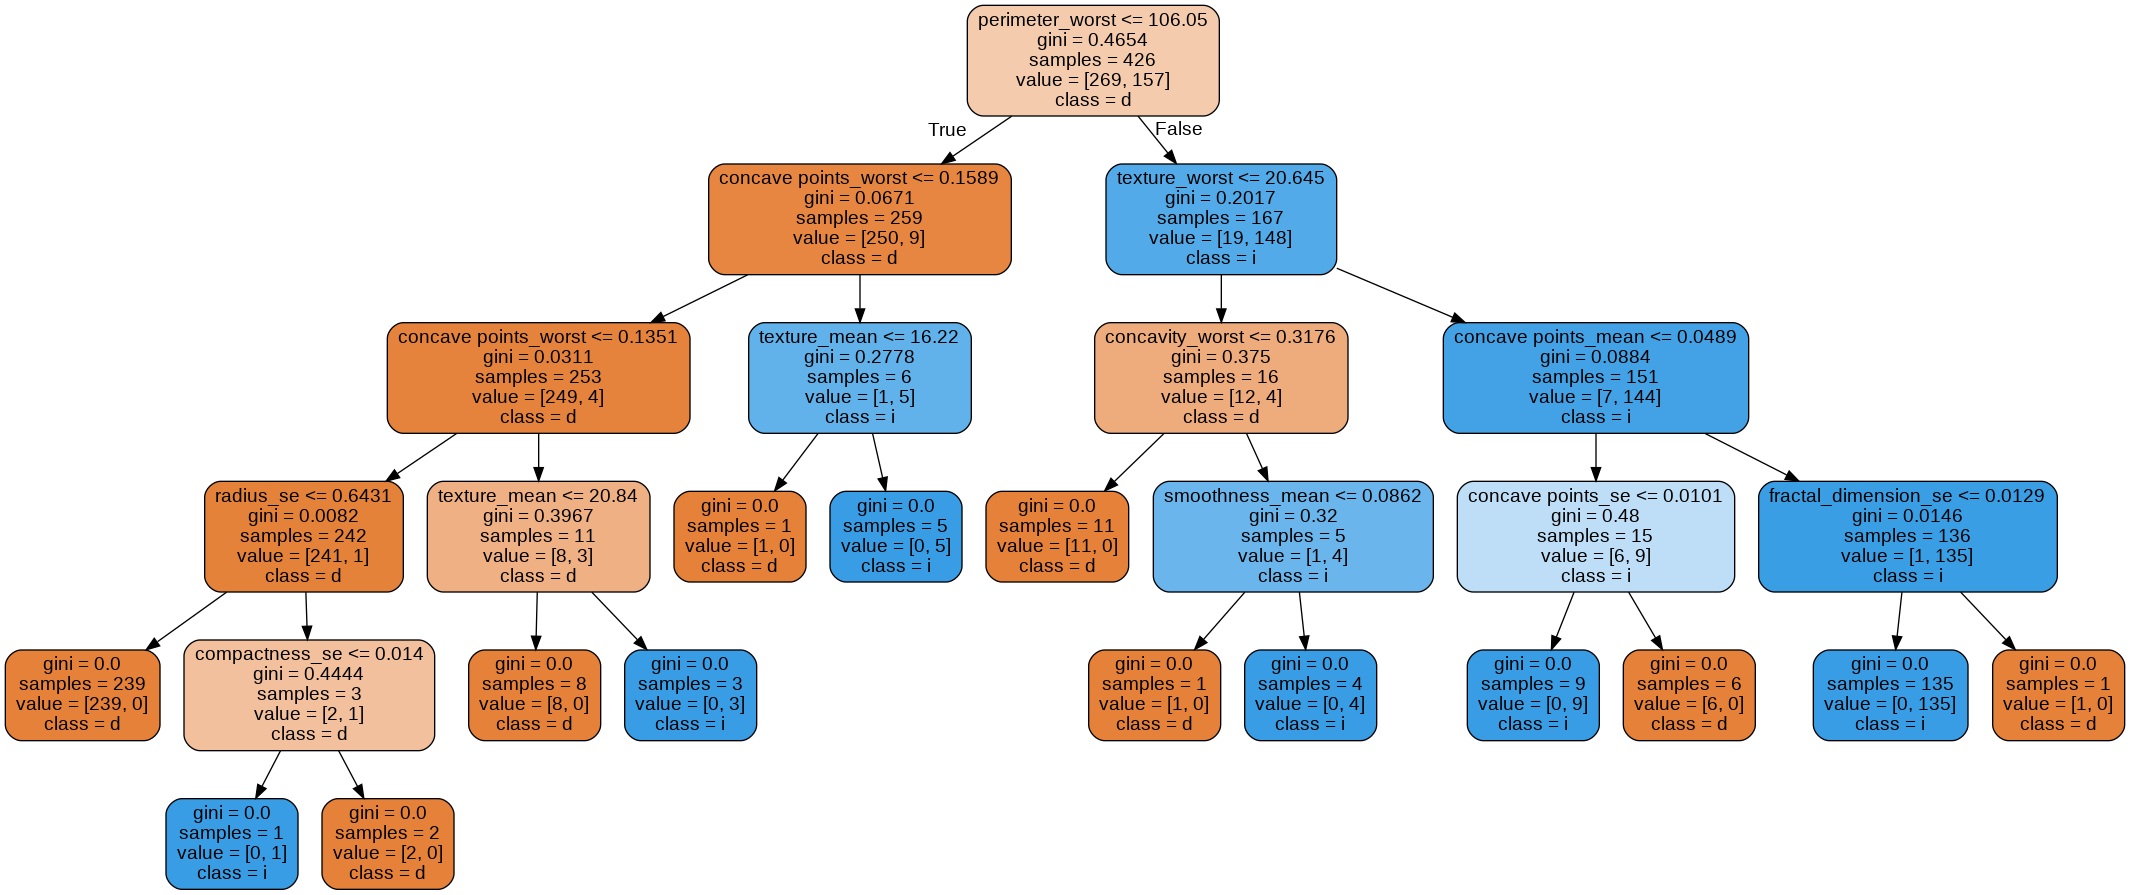

In [ ]:
from PIL import Image
from IPython.display import display

im = Image.open('tree_cancer.png')
display(im)

In [ ]:
y_pred1 = dtree1.predict(x_train)
y_pred2 = dtree1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,y_pred1)*100
print('accuracy on train data = {}'.format(train_acc))

test_acc = accuracy_score(y_test,y_pred2)*100
print('accuracy on test data = {}'.format(test_acc))

accuracy on train data = 100.0
accuracy on test data = 93.7062937062937


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred1))
print('***********************************************************')
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       157

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

***********************************************************
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        88
           1       0.93      0.91      0.92        55

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [ ]:
prune_path = dtree1.cost_complexity_pruning_path(x_train, y_train)

In [ ]:
alphas = prune_path.ccp_alphas
print(alphas)

[0.         0.00233772 0.00375587 0.00391236 0.00466031 0.0069035
 0.01032864 0.01334002 0.01839045 0.03362829 0.34560054]


In [ ]:
impurities = prune_path.impurities
print(impurities)

[0.         0.00467544 0.0084313  0.01234367 0.01700398 0.03081098
 0.04113962 0.06781967 0.08621012 0.11983841 0.46543896]


Text(0, 0.5, 'Impurities')

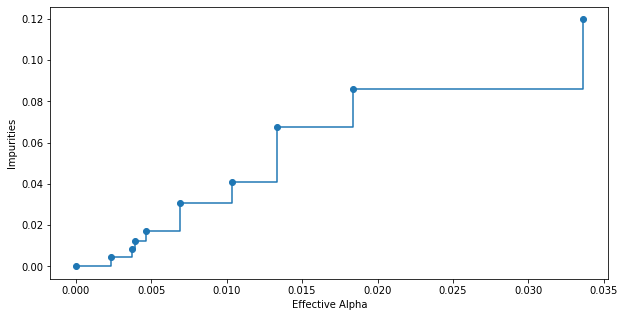

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(alphas[:-1], impurities[:-1], marker = 'o', drawstyle = 'steps-post')
ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Impurities')

In [ ]:
new_cancer_trees = []
i=0

for alpha in alphas:
  new_cancer_tree = DecisionTreeClassifier(criterion='gini', ccp_alpha = alpha)

  new_cancer_tree.fit(x_train, y_train)

  new_cancer_trees.append(new_cancer_tree)

  dot_name = 'cancer_tree' + str(i)+ '.dot'

  export_graphviz(new_cancer_tree, out_file = dot_name, feature_names = features, class_names = label, rounded = True, precision = 4, filled = True)

  graph = gr.graph_from_dot_file(dot_name)

  png = 'cancer_tree' + str(i)+ '.png'

  graph.write_png(png)

  i=i+1

In [ ]:
node_counts = []

for i in range(len(new_cancer_trees)):
  node_counts.append(new_cancer_trees[i].tree_.node_count)
  print('NUmber of Node in {}st tree is{}'.format(i,new_cancer_trees[i].tree_.node_count))

NUmber of Node in 0st tree is27
NUmber of Node in 1st tree is23
NUmber of Node in 2st tree is21
NUmber of Node in 3st tree is19
NUmber of Node in 4st tree is17
NUmber of Node in 5st tree is13
NUmber of Node in 6st tree is11
NUmber of Node in 7st tree is7
NUmber of Node in 8st tree is5
NUmber of Node in 9st tree is3
NUmber of Node in 10st tree is1


In [ ]:
depth = []
for i in range(len(new_cancer_trees)):
  depth.append(new_cancer_trees[i].get_depth())
  print('Depth in {}st tree is {}'.format(i,new_cancer_trees[i].get_depth()))

Depth in 0st tree is 5
Depth in 1st tree is 4
Depth in 2st tree is 4
Depth in 3st tree is 4
Depth in 4st tree is 4
Depth in 5st tree is 4
Depth in 6st tree is 4
Depth in 7st tree is 2
Depth in 8st tree is 2
Depth in 9st tree is 1
Depth in 10st tree is 0


Text(0.5, 1.0, 'Depth vs Alpha')

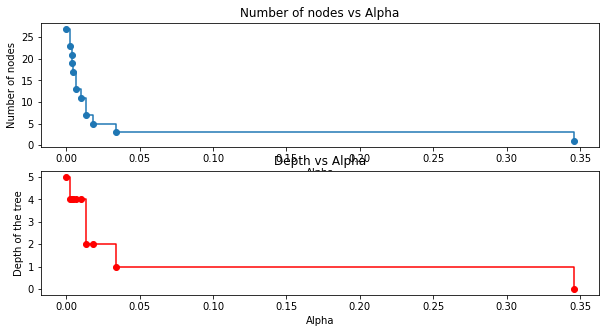

In [ ]:
fig,ax = plt.subplots(2,1, figsize = (10,5))

ax[0].plot(alphas,node_counts,marker = 'o', drawstyle = 'steps-post')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Number of nodes')
ax[0].set_title('Number of nodes vs Alpha')

ax[1].plot(alphas,depth,marker = 'o', drawstyle = 'steps-post', color = 'red')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Depth of the tree')
ax[1].set_title('Depth vs Alpha')


In [ ]:
train_scores = [new_cancer_tree.score(x_train,y_train)for new_cancer_tree in new_cancer_trees]
print(train_scores)
print('max train_score = {}'.format(max(train_scores)))
print('position of max train score = {}'.format(np.argmax(train_scores)))

[1.0, 0.9976525821596244, 0.9953051643192489, 0.9929577464788732, 0.9906103286384976, 0.9835680751173709, 0.9765258215962441, 0.9624413145539906, 0.9530516431924883, 0.9342723004694836, 0.6314553990610329]
max train_score = 1.0
position of max train score = 0


In [ ]:
test_scores = [new_cancer_tree.score(x_test,y_test)for new_cancer_tree in new_cancer_trees]
print(test_scores)
print('max train_score = {}'.format(max(test_scores)))
print('position of max train score = {}'.format(np.argmax(test_scores)))

[0.9370629370629371, 0.9300699300699301, 0.951048951048951, 0.9370629370629371, 0.965034965034965, 0.951048951048951, 0.916083916083916, 0.8881118881118881, 0.8671328671328671, 0.8741258741258742, 0.6153846153846154]
max train_score = 0.965034965034965
position of max train score = 4


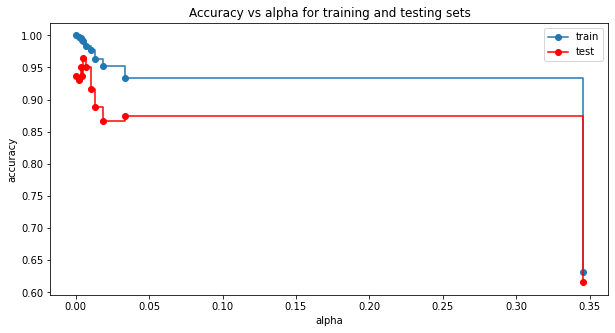

In [ ]:
fig,ax = plt.subplots(figsize= (10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker ='o', label = 'train',drawstyle = 'steps-post')
ax.plot(alphas, test_scores, marker ='o', label = 'test',drawstyle = 'steps-post', color = 'red')
ax.legend()

In [ ]:
pruned_cancer_tree = DecisionTreeClassifier(criterion='gini', ccp_alpha = alphas[np.argmax(test_scores)])
pruned_cancer_tree.fit(x_train, y_train)

new_ypred_train = pruned_cancer_tree.predict(x_train)
new_ypred_test = pruned_cancer_tree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

new_train_acc = accuracy_score(y_train,new_ypred_train)*100
print('accuracy on train data = {}'.format(new_train_acc))

new_test_acc = accuracy_score(y_test,new_ypred_test)*100
print('accuracy on test data = {}'.format(new_test_acc))

accuracy on train data = 99.06103286384976
accuracy on test data = 96.5034965034965


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,new_ypred_train))
print('***********************************************************')
print(classification_report(y_test,new_ypred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       269
           1       0.98      0.99      0.99       157

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

***********************************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        88
           1       0.96      0.95      0.95        55

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

